In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df['species'] = df.target.apply(lambda x:iris.target_names[x])

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
df0 = df[df.target== 0]
df1 = df[df.target== 1]
df2 = df[df.target== 2]

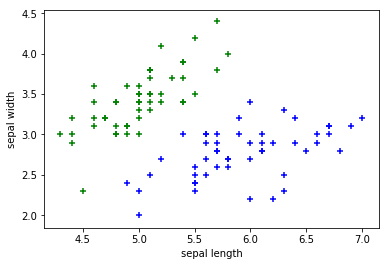

In [12]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],c='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],c='blue',marker='+')


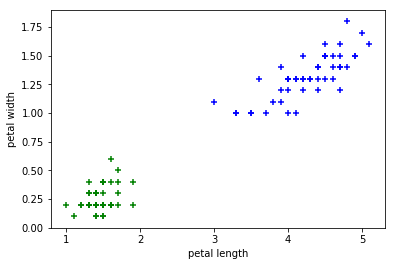

In [13]:
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],c='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],c='blue',marker='+')


we can simply make the hyperplane line and have large margin

In [14]:
x = df.drop(['target','species'],axis=1)
y = df.target

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [16]:
from sklearn.svm import SVC 
model = SVC(gamma='auto',kernel='rbf')

In [17]:
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
model.score(x_test,y_test)

0.9666666666666667

The above result is the accuracy of SVM model

Now we can split the training and testing data using StratifiedKFold cross validation technique

In [19]:
x = df.drop(['target','species'],axis=1).values
y = df.target.values
from sklearn.svm import SVC 
model = SVC(gamma='auto',kernel='rbf')
from sklearn.model_selection import StratifiedKFold
fold = StratifiedKFold(n_splits=5)
accuracy = []
for train_index, test_index in fold.split(x,y):
    x_train,x_test,y_train,y_test = x[train_index],x[test_index],y[train_index],y[test_index]
    model.fit(x,y)
    model.predict(x_test)
    score = model.score(x_test,y_test)
    accuracy.append(score)

In [20]:
accuracy

[1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 1.0]

In [21]:
accu = [a*100 for a in accuracy]
accu

[100.0, 100.0, 96.66666666666667, 96.66666666666667, 100.0]